### 시각화하기

In [2]:
# 1. Load Data
import pandas as pd

# Load the data
data = pd.read_csv('../DATA/data_with_btc.csv', index_col=0)
data

,date,btc,Gold,Dollar,SnP
0,2017-08-17,0.015684,0.480857,0.238677,0.452232
1,2017-08-18,0.013155,0.480487,0.236642,0.451379
2,2017-08-21,0.011834,0.482848,0.233001,0.451922
3,2017-08-22,0.012177,0.480209,0.237927,0.456596
4,2017-08-23,0.013236,0.481922,0.233644,0.454947
...,...,...,...,...,...
1734,2024-03-26,0.955863,0.895375,0.353036,0.990148
1735,2024-03-27,0.948451,0.906902,0.354428,0.998856
1736,2024-03-28,0.967205,0.918800,0.355498,1.000000
1737,2024-03-29,0.953896,0.926392,0.355070,0.999486


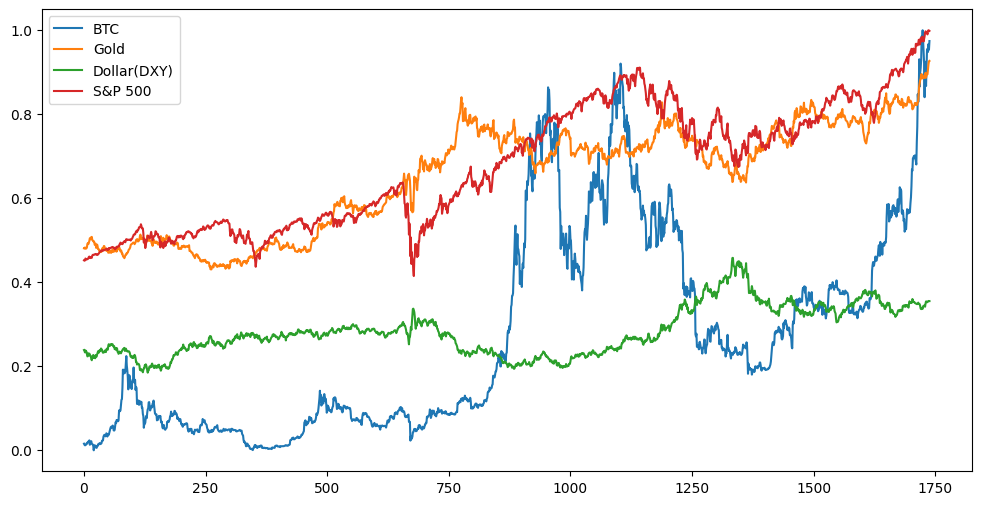

In [3]:
# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data['btc'], label='BTC')
plt.plot(data['Gold'], label='Gold')
plt.plot(data['Dollar'], label='Dollar(DXY)')
plt.plot(data['SnP'], label='S&P 500')
plt.legend()
plt.show()

### 문제점 : 전처리에서 표준화하고 와버려서 min이 0이 아니다

In [4]:
# 새로 만들어야함,,,
gds = pd.read_csv('../DATA/data_fill_791226_240419.csv')
btc = pd.read_csv('../DATA/BTCUSDT_1d.csv')
gds, btc

(               날짜    Gold      SnP  Dollar
 0      1979-12-26   514.3   107.80   85.99
 1      1979-12-27   532.0   108.00   85.51
 2      1979-12-28   533.0   107.80   85.81
 3      1979-12-31   549.4   107.90   85.82
 4      1980-01-01   561.9   107.90   85.57
 ...           ...     ...      ...     ...
 11491  2024-04-15  2383.0  5061.82  106.20
 11492  2024-04-16  2407.8  5051.41  106.34
 11493  2024-04-17  2388.4  5022.21  105.96
 11494  2024-04-18  2398.0  5011.12  106.18
 11495  2024-04-19  2413.8  4967.23  106.12
 
 [11496 rows x 4 columns],
        timestamp     close
 0     2017-08-17   4285.08
 1     2017-08-18   4108.37
 2     2017-08-19   4139.98
 3     2017-08-20   4086.29
 4     2017-08-21   4016.00
 ...          ...       ...
 2414  2024-03-27  69469.99
 2415  2024-03-28  70780.60
 2416  2024-03-29  69850.54
 2417  2024-03-30  69582.18
 2418  2024-03-31  71280.01
 
 [2419 rows x 2 columns])

In [12]:
# 날짜, timestamp를 datetime으로 변환 후 btc 기준 merge
gds['date'] = pd.to_datetime(gds['날짜'])
btc['date'] = pd.to_datetime(btc['timestamp'])

gds = gds.set_index('date')
btc = btc.set_index('date')
data = pd.merge(gds, btc, how='inner', left_index=True, right_index=True)
data_index = data.index
data

,날짜,Gold,SnP,Dollar,timestamp,close
date,,,,,,
2017-08-17,2017-08-17,1292.400000,2430.00,93.62,2017-08-17,4285.08
2017-08-18,2017-08-18,1291.600000,2425.60,93.43,2017-08-18,4108.37
2017-08-21,2017-08-21,1296.700000,2428.40,93.09,2017-08-21,4016.00
2017-08-22,2017-08-22,1291.000000,2452.50,93.55,2017-08-22,4040.00
2017-08-23,2017-08-23,1294.700000,2444.00,93.15,2017-08-23,4114.01
...,...,...,...,...,...,...
2024-03-26,2024-03-26,2187.800000,5203.60,104.30,2024-03-26,69988.00
2024-03-27,2024-03-27,2212.700000,5248.50,104.43,2024-03-27,69469.99
2024-03-28,2024-03-28,2238.400000,5254.40,104.53,2024-03-28,70780.60


In [13]:
# close -> btc
data = data.rename(columns={'close': 'btc'})
data = data[['btc', 'Gold', 'Dollar', 'SnP']]
data

,btc,Gold,Dollar,SnP
date,,,,
2017-08-17,4285.08,1292.400000,93.62,2430.00
2017-08-18,4108.37,1291.600000,93.43,2425.60
2017-08-21,4016.00,1296.700000,93.09,2428.40
2017-08-22,4040.00,1291.000000,93.55,2452.50
2017-08-23,4114.01,1294.700000,93.15,2444.00
...,...,...,...,...
2024-03-26,69988.00,2187.800000,104.30,5203.60
2024-03-27,69469.99,2212.700000,104.43,5248.50
2024-03-28,70780.60,2238.400000,104.53,5254.40


In [14]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns=['btc', 'Gold', 'Dollar', 'SnP'])
data

,btc,Gold,Dollar,SnP
0,0.015684,0.101088,0.197100,0.063838
1,0.013155,0.100342,0.189655,0.062380
2,0.011834,0.105098,0.176332,0.063308
3,0.012177,0.099782,0.194357,0.071296
4,0.013236,0.103233,0.178683,0.068479
...,...,...,...,...
1734,0.955863,0.936090,0.615596,0.983162
1735,0.948451,0.959310,0.620690,0.998044
1736,0.967205,0.983276,0.624608,1.000000
1737,0.953896,0.998570,0.623041,0.999122


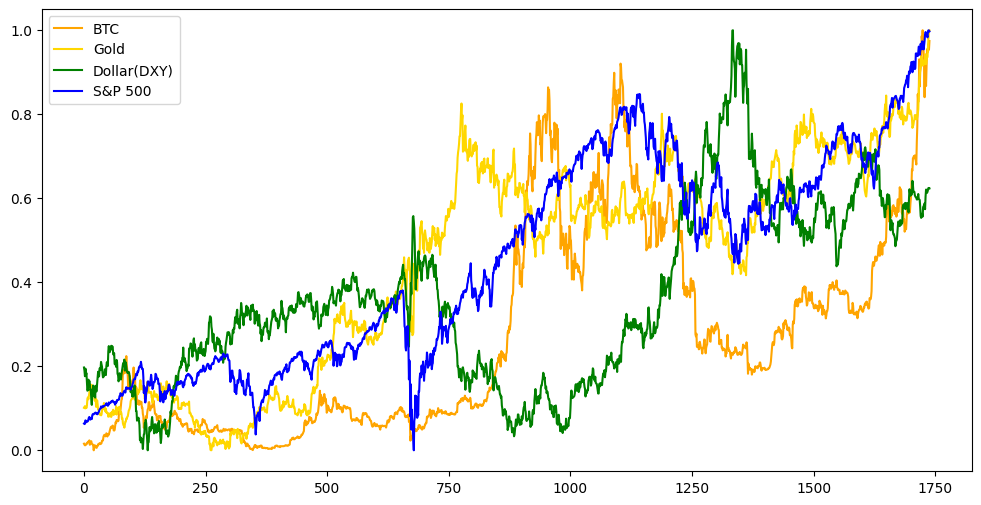

In [15]:
# visualize
plt.figure(figsize=(12, 6))
plt.plot(data['btc'], label='BTC', color='orange')
plt.plot(data['Gold'], label='Gold', color= 'gold')
plt.plot(data['Dollar'], label='Dollar(DXY)', color='green')
plt.plot(data['SnP'], label='S&P 500', color='blue')
plt.legend()
plt.show()

In [17]:
# set index
data.index = data_index
data

,btc,Gold,Dollar,SnP
date,,,,
2017-08-17,0.015684,0.101088,0.197100,0.063838
2017-08-18,0.013155,0.100342,0.189655,0.062380
2017-08-21,0.011834,0.105098,0.176332,0.063308
2017-08-22,0.012177,0.099782,0.194357,0.071296
2017-08-23,0.013236,0.103233,0.178683,0.068479
...,...,...,...,...
2024-03-26,0.955863,0.936090,0.615596,0.983162
2024-03-27,0.948451,0.959310,0.620690,0.998044
2024-03-28,0.967205,0.983276,0.624608,1.000000


In [18]:
# save data
data.to_csv('../DATA/data_with_btc_scaled.csv')